In [1]:
install.packages("corrplot")
install.packages("ggcorrplot")
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
library(RColorBrewer)
library(corrplot)
library(ggcorrplot)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ 

# GROUP PROPOSAL: WINE TASTING

## Introduction

Wine quality highly depends on its composition of various aromatic compounds which have diverse chemical properties. Understanding the interactions between these compounds and how it can affect the final wine product has become an important part in the creation of better wine flavors. Likewise, by assessing the content of wines such as their acidity, sugar content, and pH value, we will be able to determine how good or bad the wine is. In this project, we will be using the wine quality dataset obtained from a web URL to solve a multiclass classification problem —- what would be the wine’s quality level given its values on the wine type, fixed acidity, volatile acidity, and other variables. There are 12 variables in total that are used to predict the wine quality, which ranges from 3 to 9, with 9 being the highest quality wine. 


## Preliminary exploratory data analysis

1. Data Reading

In [17]:
temp <- tempfile()
download_file <- download.file("https://archive.ics.uci.edu/static/public/186/wine+quality.zip", temp)
red_wine <- read.csv2(unz(temp, "winequality-red.csv")) |>
             mutate(type = "Red")
white_wine <- read.csv2(unz(temp, "winequality-white.csv")) |>
              mutate(type ="White")
unlink(temp)

2. Data Wrangling

In [18]:
wine_data <- rbind(red_wine, white_wine) |>
             mutate(across(fixed.acidity:alcohol, as.numeric), quality = as_factor(quality),
                   type = as_factor(type))
write_csv(wine_data, "../data/wine_data.csv")
head(wine_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Red


3. Data Splitting

In [19]:
set.seed(2000)
wine_split <- initial_split(wine_data, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

4. Summarization

a. The number of observations in each red wine/white wine class

In [20]:
wine_type_number <- wine_training |>
                    group_by(type) |>
                    summarize(Number = n())
wine_type_number

type,Number
<fct>,<int>
Red,1204
White,3667


- We have 4898 observations for White wine and 1599 observations for Red wine.
- There is a significant imbalance between the types of the wine. This will affect the model. Hence we will not use this variable

b. The number of observations for each quality level.

In [15]:
quality_number <- wine_training |>
                  group_by(quality) |>
                  summarize(Number = n())
quality_number

quality,Number
<fct>,<int>
3,24
4,166
5,1602
6,2123
7,814
8,138
9,4


- We are missing two classes: 0, 1, 2 and 10.
- This is another class imbalance existed within the class

c. Mean value of each measurements for different quality type.

In [16]:
mean_measurements <- wine_training |>
                     group_by(quality) |>
                     summarize(mean_fixed_acidity = mean(fixed.acidity),
                               mean_volatile_acidity = mean(volatile.acidity),
                               mean_citric_acid = mean(citric.acid),
                               mean_residual_sugar = mean(residual.sugar),
                               mean_chlorides = mean(chlorides),
                               mean_free_sufdioxide = mean(free.sulfur.dioxide),
                               mean_tot_sufdioxide = mean(total.sulfur.dioxide),
                               mean_density = mean(density),
                               mean_ph = mean(pH),
                               mean_sulphates = mean(sulphates),
                               mean_alcohol = mean(alcohol))
mean_measurements

quality,mean_fixed_acidity,mean_volatile_acidity,mean_citric_acid,mean_residual_sugar,mean_chlorides,mean_free_sufdioxide,mean_tot_sufdioxide,mean_density,mean_ph,mean_sulphates,mean_alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,7.691667,0.5508333,0.2691667,4.175000,0.08358333,37.83333,106.0625,0.9957779,3.295833,0.5241667,10.093750
4,7.228313,0.4607229,0.2688554,4.157831,0.06107229,20.98494,104.0753,0.9948237,3.238855,0.4960843,10.174096
5,7.329650,0.3903059,0.3072472,5.791386,0.06469975,30.53620,121.2871,0.9958513,3.209782,0.5262360,9.842258
6,7.177932,0.3154169,0.3211823,5.620066,0.05453132,31.30664,115.3457,0.9946097,3.218031,0.5326189,10.575820
7,7.086978,0.2861548,0.3318182,4.740111,0.04485012,30.39435,108.0682,0.9930359,3.227826,0.5438084,11.414742
8,6.795652,0.2953261,0.3239130,5.638043,0.04083333,35.31884,120.9058,0.9926056,3.222319,0.5135507,11.650000
9,7.000000,0.3050000,0.3700000,2.500000,0.02550000,34.75000,114.0000,0.9900750,3.335000,0.4675000,12.625000


d. Missing data - We have no missing data in this dataset.

4. Visualization

a. The distribution between variables

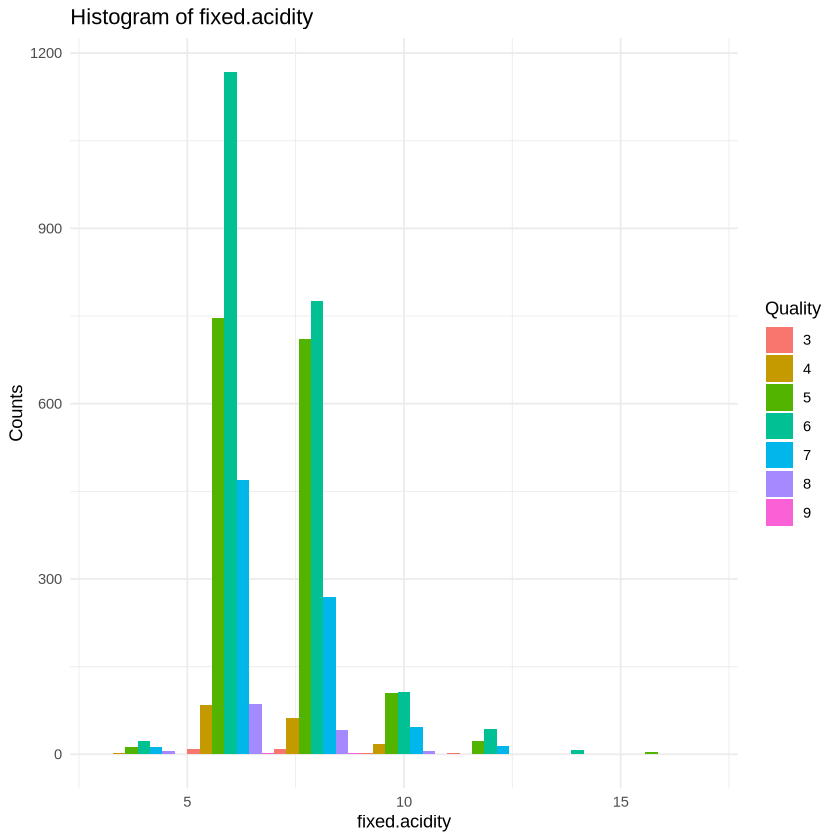

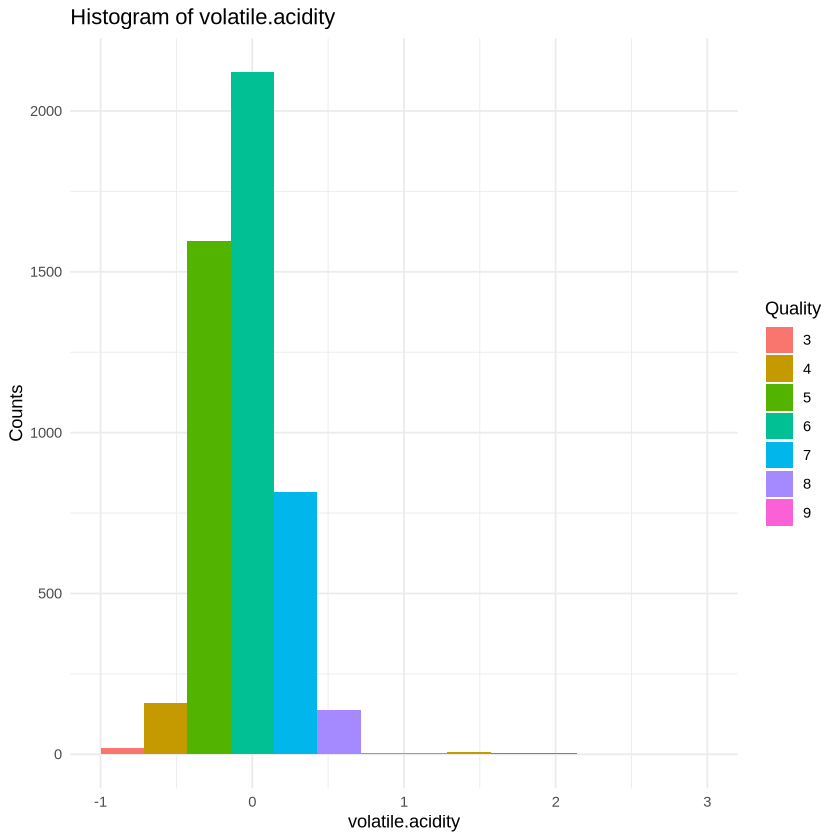

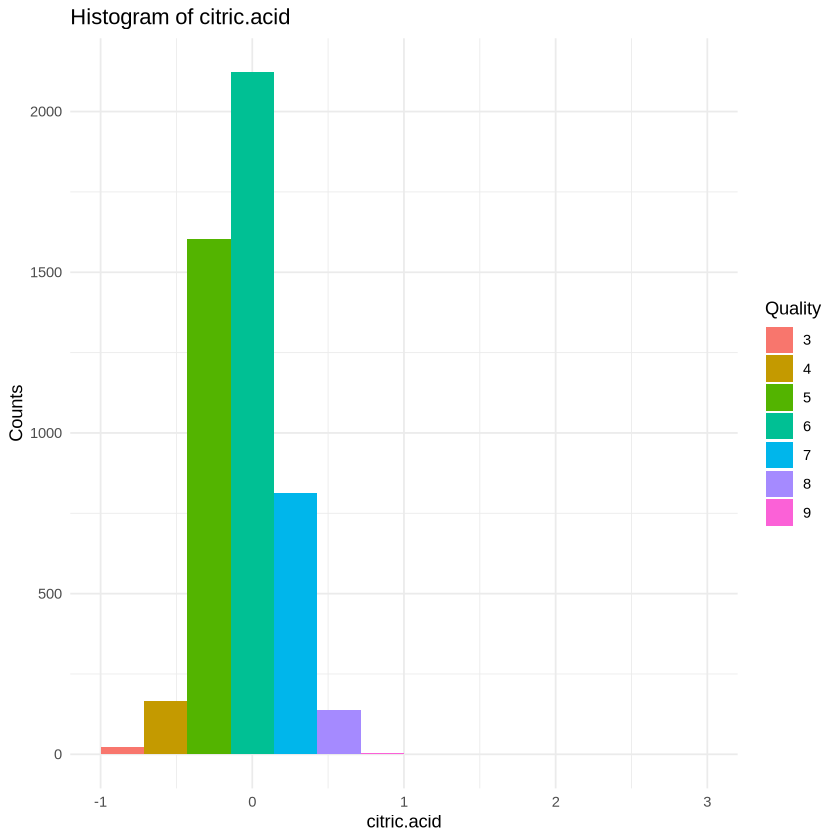

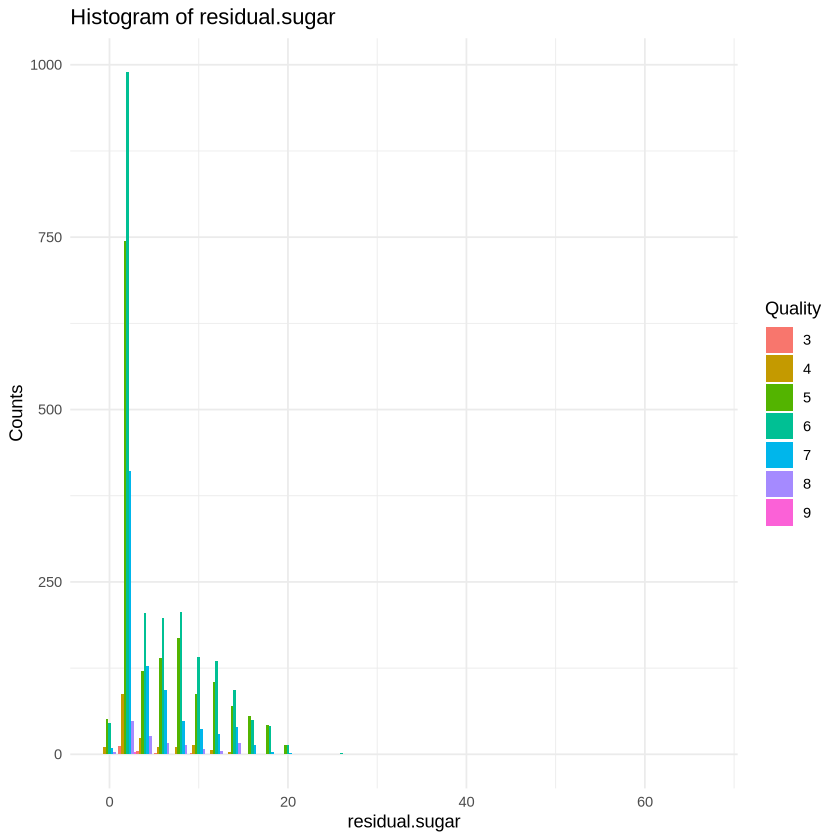

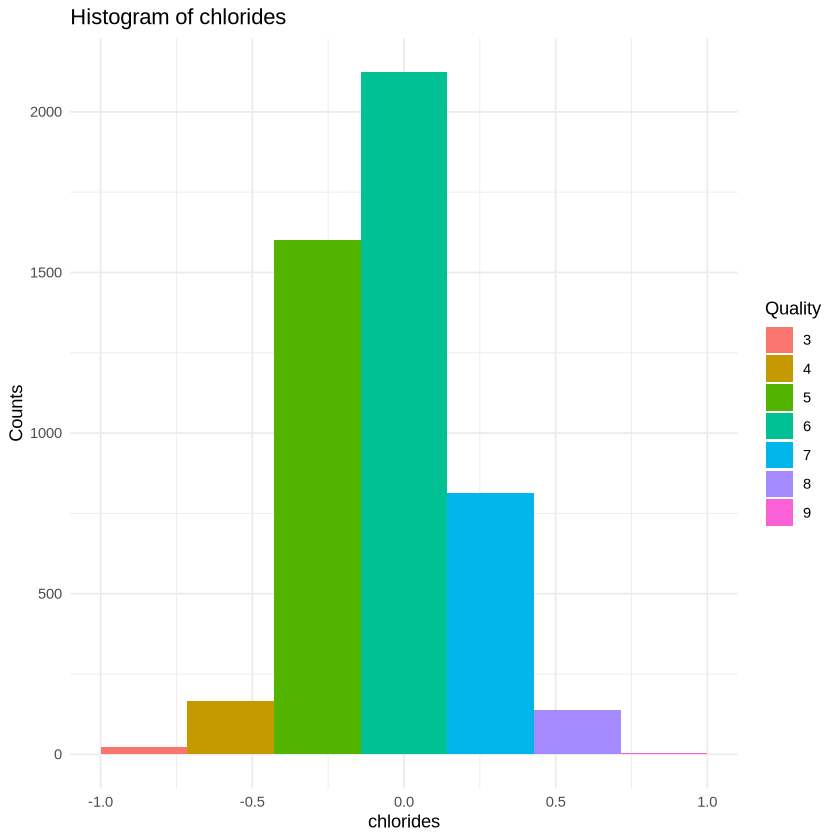

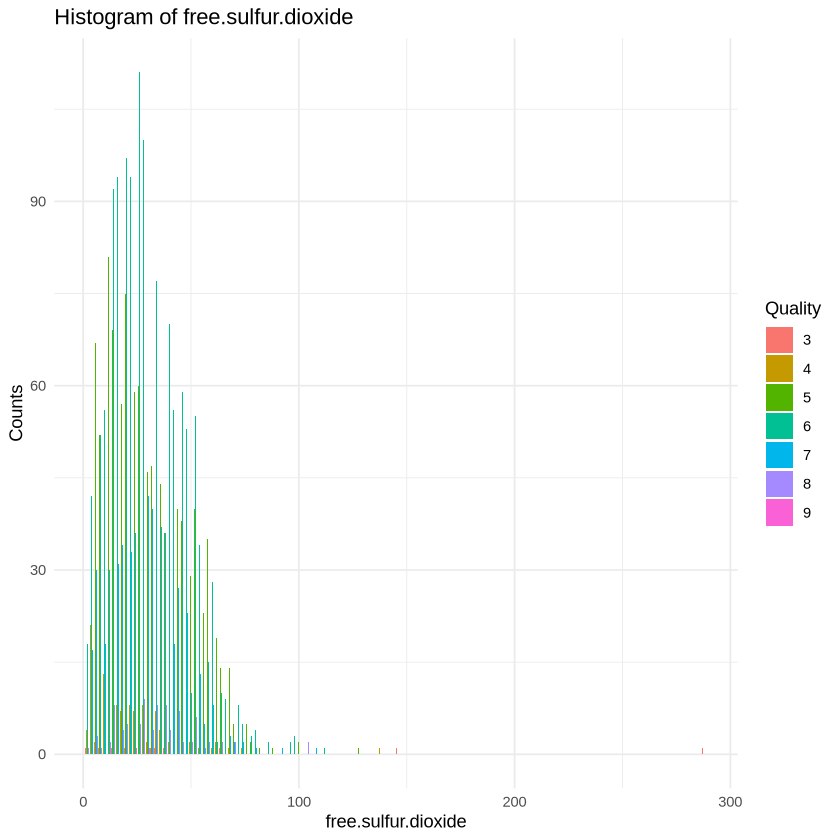

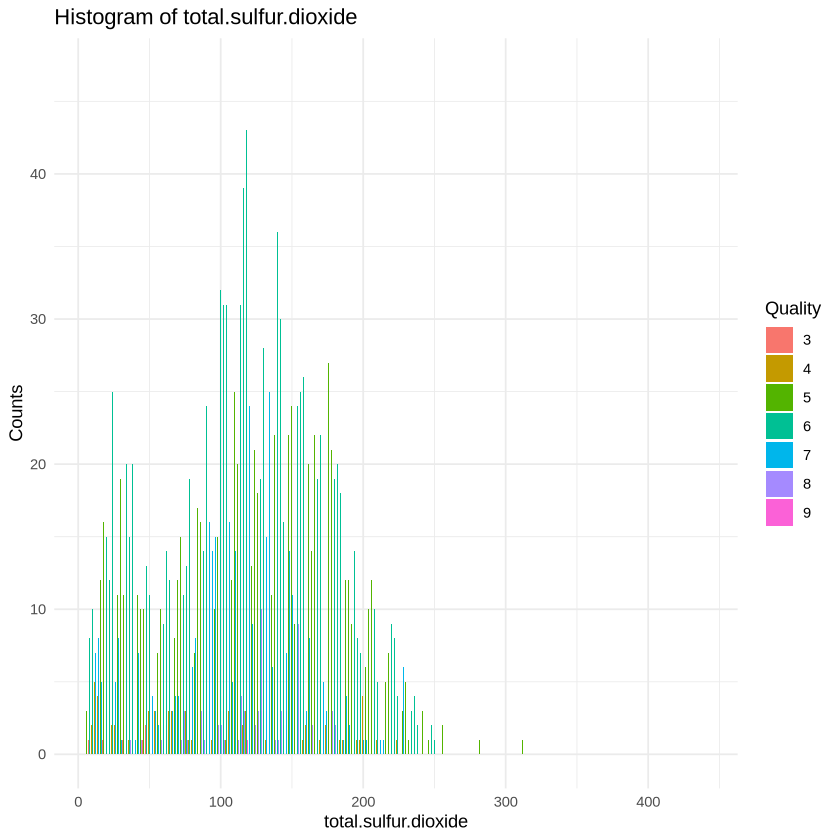

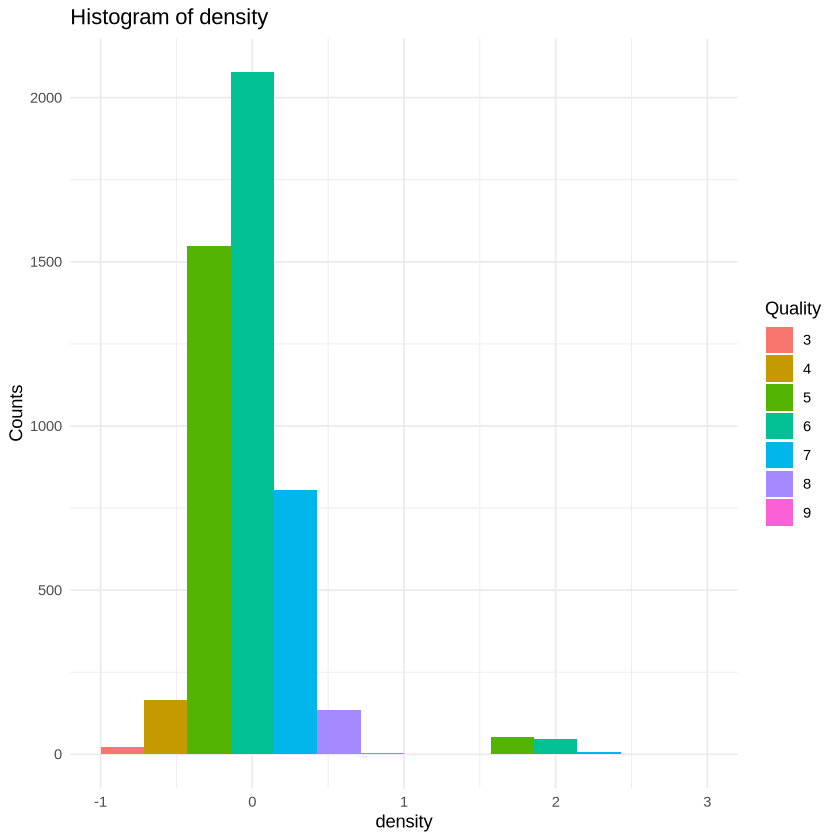

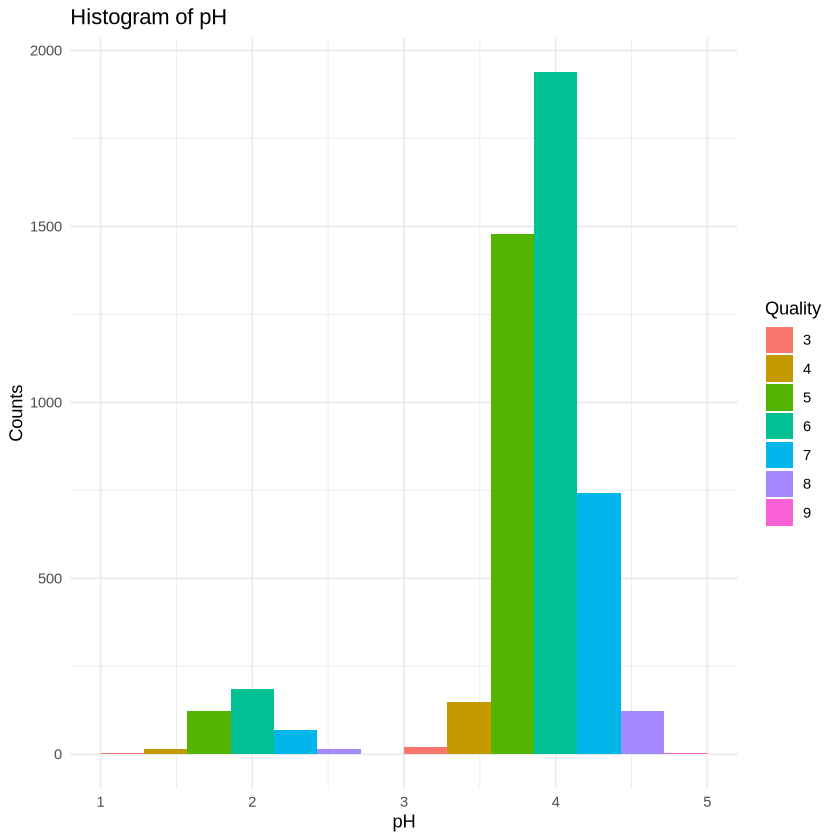

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]


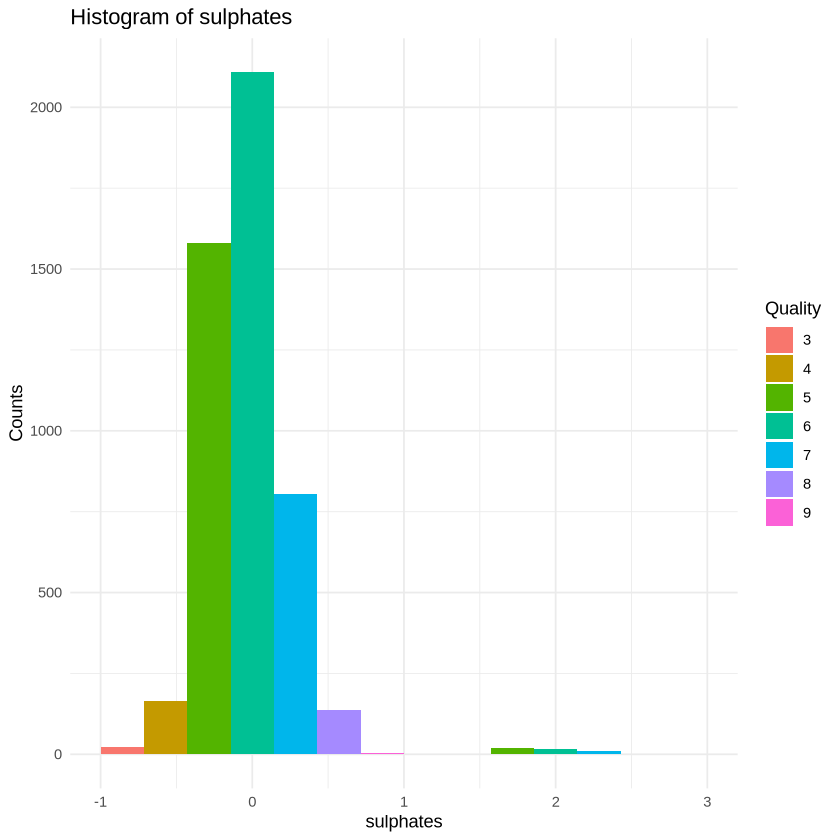

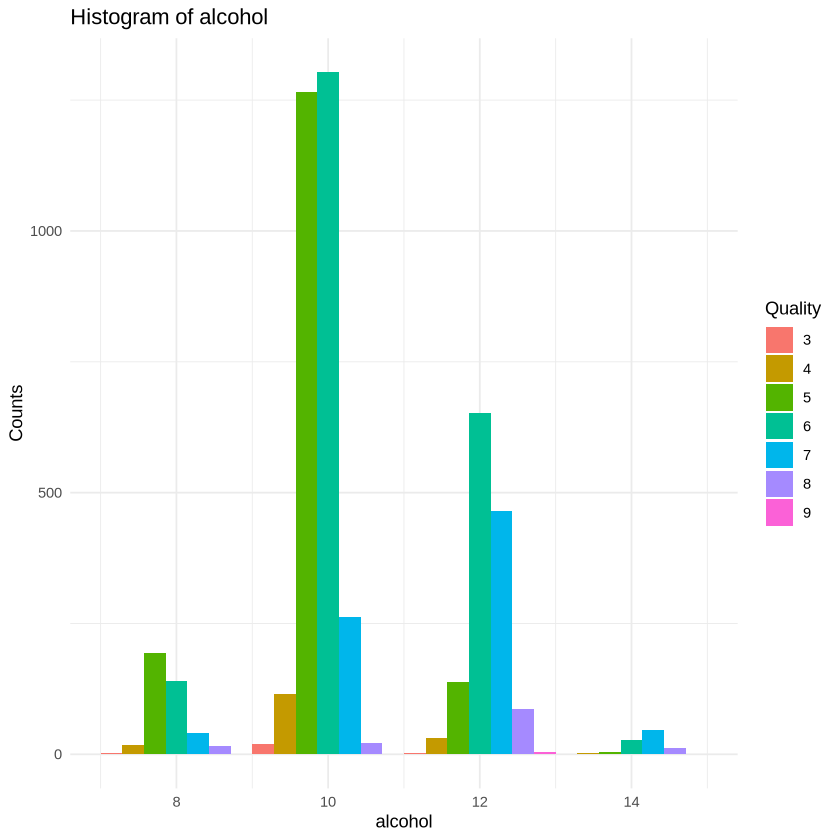

In [44]:
wine_filter <- wine_training |>
               select(-type)

histograms <- lapply(names(wine_filter)[!names(wine_filter) %in% c("quality")], function(col) {
  ggplot(wine_filter, aes(x = !!sym(col), fill = quality)) +
    geom_histogram(position = "dodge", bins = 100, binwidth = 2) +
    labs(title = paste("Histogram of", col), x = col, y = "Counts", fill = "Quality") +
    theme_minimal()
})

histograms

- Most variables have a linear negative correlation to quality
- However, free.sulfur.dioxide and total.sulfur. dioxide seems to have no correlation with quality as the categories are layered in the histogram.
- alcohol and residual.sugar have a non-linear relationship with quality

b. Correlation between variables

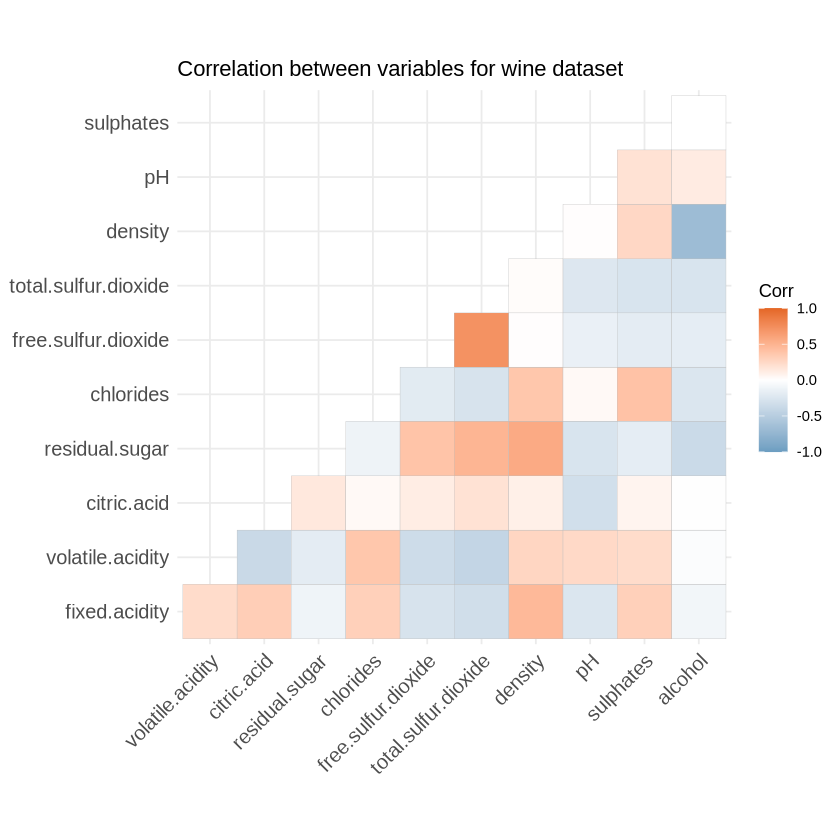

In [54]:
heat_map_data <- wine_training %>%
  select(-quality, -type)

# Calculate the correlation matrix
heat_map_corr <- cor(heat_map_data)

# Create the correlation heatmap
ggcorrplot(heat_map_corr, type = "lower", colors = c("#6D9EC1", "white", "#E46726")) +
  ggtitle("Correlation between variables for wine dataset")

- Alcohol sugar seems to not have relationship with other factor

## Methods

After reading the data frame into R and performed data wrangling, we did a quick inspection on the dataset and decided to included all 12 features/variables in our data analysis to predict the wine quality in the preliminary exploratory data analysis —- which include fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and wine type. All the variables are decided to be used for prediction considering the content in wines can interact with each other and affect the values of each other, which ultimately impact the quality of wine. 

To further explore the dataset, we compared the number of observations in each red/ white wine class, the number of observations in each quality level for red and white wine respectively, and the mean value of each feature for each quality level. 

To visualize the relationship between each variable and the wine quality, we graphed multiple histograms, each with one predictor on the x axis, counts on the y axis, and color indicating the different quality levels. If each quality level tends to show up on a certain value of the x axis, we can conclude that there is linear correlation between the wine quality and that predictor. If multiple quality levels show up on one value on the x axis, we can conclude that there is no correlation or non-linear correlation. 

## Expected outcomes and significance

With the multi-histogram from the preliminary data analysis, we discovered that the wine quality has no correlation with total sulfur dioxide and free sulfur dioxide. We also found that it has a non-linear correlation with alcohol and residual sugar, while having a linear correlation with the rest of the variables. Although the wine quality has a class imbalance, and means are widely varied between variables which would be scaled later, it is expected that we should be able to predict the wine quality by using all variables except total sulfur dioxide and free sulfur dioxide. 

These findings will allow a more efficient and more systematic wine quality assessment as we will be able assess the quality of the wines not only by its age or individual tastes, but also the actual content in the wine itself. The findings can also lead to further discoveries such as how different wine storage or different environments in which the grapes grew in would affect the quality of the wines, in which they can be used to optimize the wine development.
